# Logistic Regression from scratch

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

Once the model is trained, it can be used to make predictions on new data by inputting the values of the independent variables into the logistic function and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a threshold probability value that is chosen by the user.

In [1]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

Test

In [2]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


Visualize

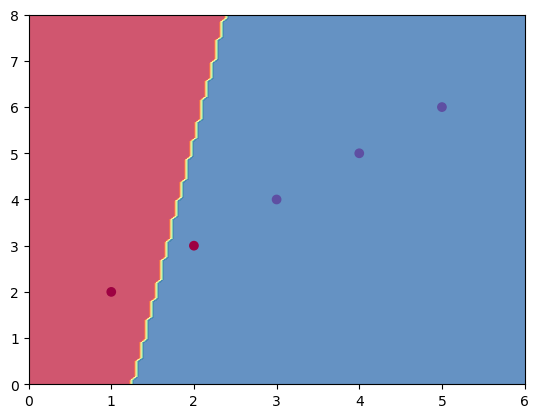

In [3]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()